In [1]:
from zipfile import ZipFile

with ZipFile('data/train.csv.zip').open('train.csv') as f:
    for _ in range(6):
        print f.readline()

row_id,x,y,accuracy,time,place_id

0,0.7941,9.0809,54,470702,8523065625

1,5.9567,4.7968,13,186555,1757726713

2,8.3078,7.0407,74,322648,1137537235

3,7.3665,2.5165,65,704587,6567393236

4,4.0961,1.1307,31,472130,7440663949



In [2]:
with ZipFile('data/test.csv.zip').open('test.csv') as f:
    for _ in range(6):
        print f.readline()

row_id,x,y,accuracy,time

0,0.1675,1.3608,107,930883

1,7.3909,2.5301,35,893017

2,8.0978,2.3473,62,976933

3,0.999,1.0591,62,907285

4,0.667,9.7254,40,914399



In [3]:
with ZipFile('data/sample_submission.csv.zip').open('sample_submission.csv') as f:
    for _ in range(6):
        print f.readline()

row_id,place_id

0,3073560757 9004412889 5652080691

1,1652178628 4379515211 6612350960

2,4894407065 3920195083 7608574746

3,7272466660 2004687925 1455486822

4,4720452725 4967325204 4782917866



In [4]:
import pandas as pd

df_train = pd.read_csv(ZipFile('data/train.csv.zip').open('train.csv'), index_col='row_id')
df_train.head()

,x,y,accuracy,time,place_id
row_id,,,,,
0,0.7941,9.0809,54,470702,8523065625
1,5.9567,4.7968,13,186555,1757726713
2,8.3078,7.0407,74,322648,1137537235
3,7.3665,2.5165,65,704587,6567393236
4,4.0961,1.1307,31,472130,7440663949


In [5]:
len(df_train)

29118021

In [6]:
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab
%matplotlib inline
matplotlib.style.use('ggplot')
#pylab.rcParams['figure.figsize'] = 16, 12
#matplotlib.rcParams["figure.figsize"] = (16.0, 12.0)

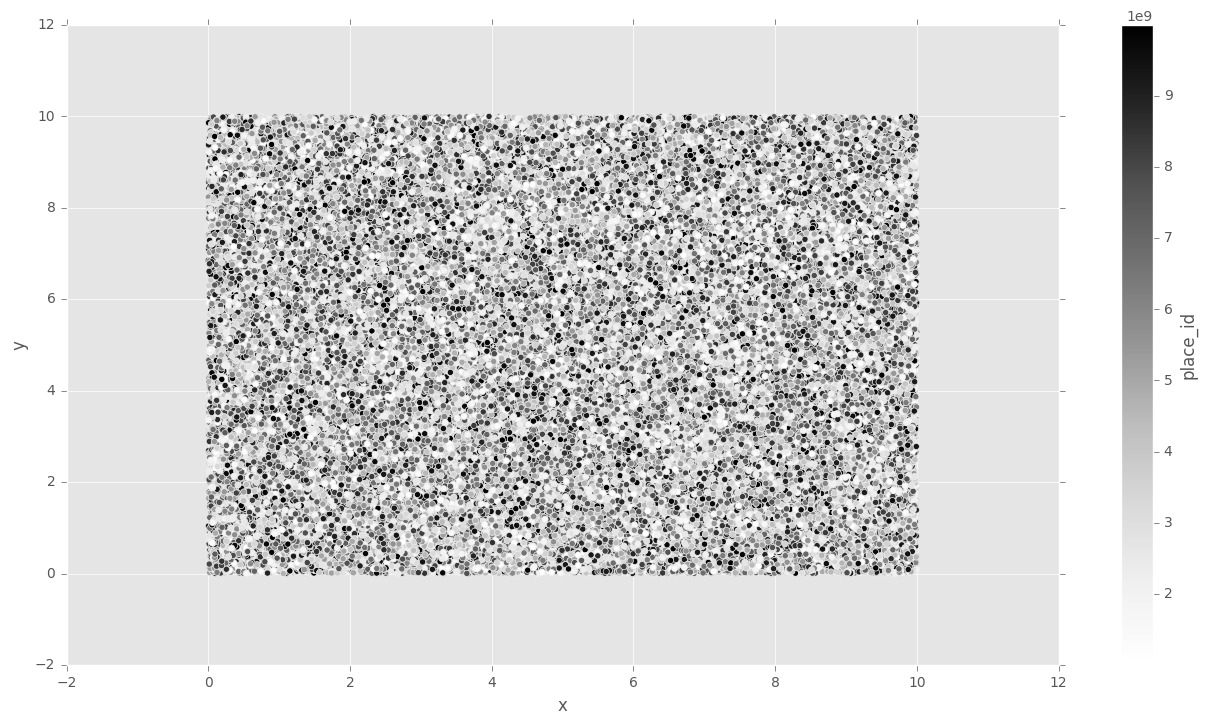

In [7]:
df_train.sample(100000).plot(kind='scatter', x='x', y='y', c='place_id')

In [8]:
len(df_train['place_id'].unique())

108390

In [9]:
import numpy as np

aggregate = {
    'x' : 'mean',
    'y' : 'mean',
    'place_id' : 'count'
}
df_train_centroids = df_train[['x', 'y', 'place_id']].groupby('place_id').agg(aggregate)

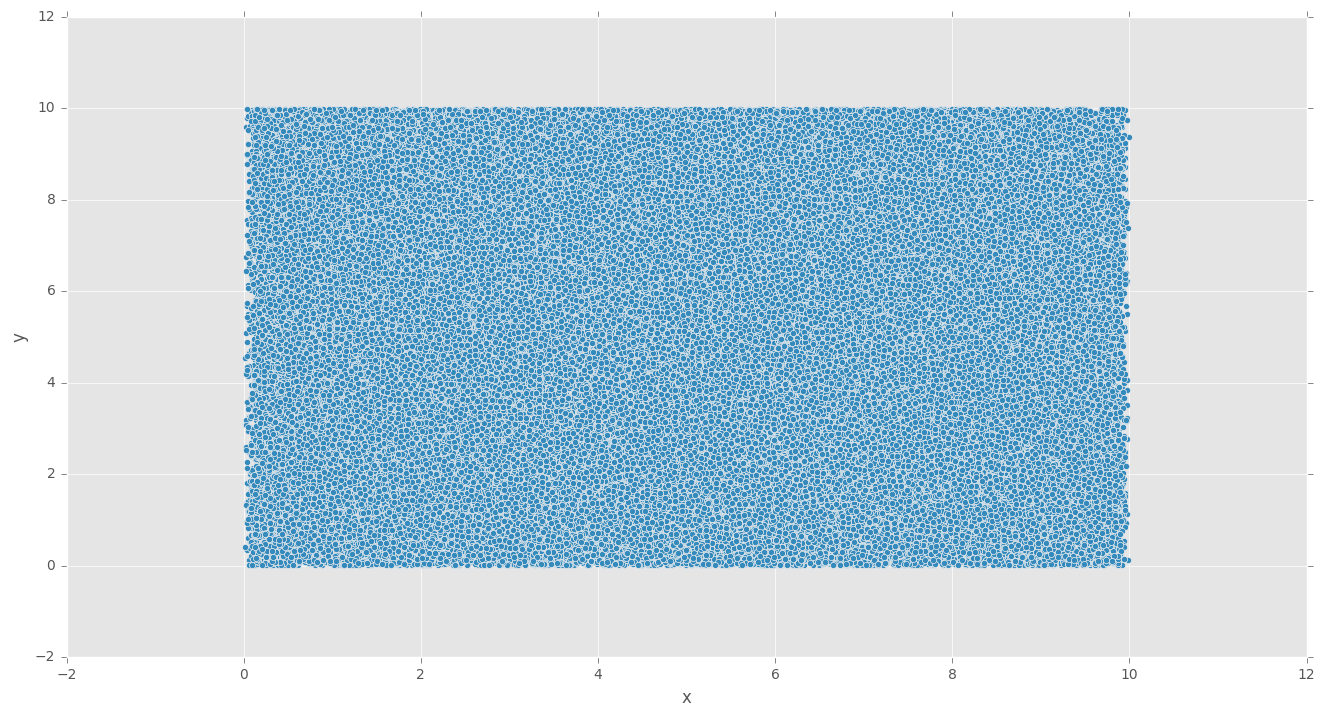

In [10]:
df_train_centroids.plot(kind='scatter', x='x', y='y')

In [11]:
df_train_centroids.place_id.sum()

29118021

In [12]:
df_train['time'].min()

1

In [13]:
df_train['time'].max()

786239

In [14]:
from ggplot import *

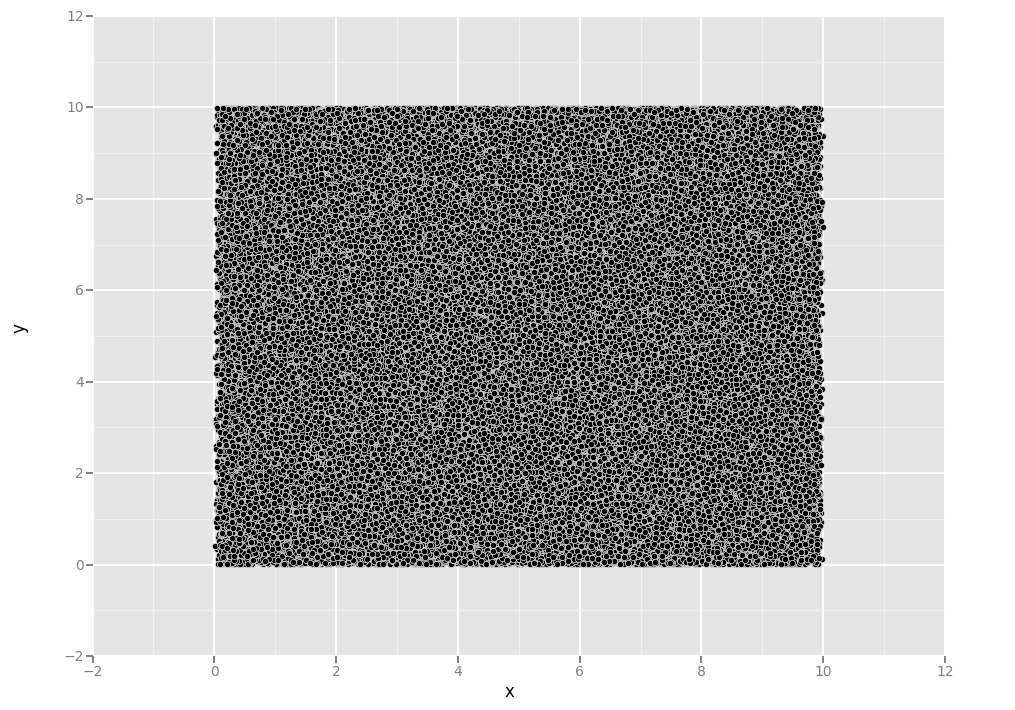

<ggplot: (289773381)>

In [15]:
p = ggplot(df_train_centroids, aes(x='x', y='y')) +\
        geom_point()
p

In [16]:
s_top_places = df_train_centroids.sort_values('place_id', ascending=False).head(10).index.values

In [23]:
df_top_places = df_train[df_train['place_id'].isin(s_top_places)]
df_top_places['place_id'] = df_top_places['place_id'].astype(str)
df_top_places['accuracy_inv'] = 1/df_top_places['accuracy']

/Users/jdamiani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jdamiani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


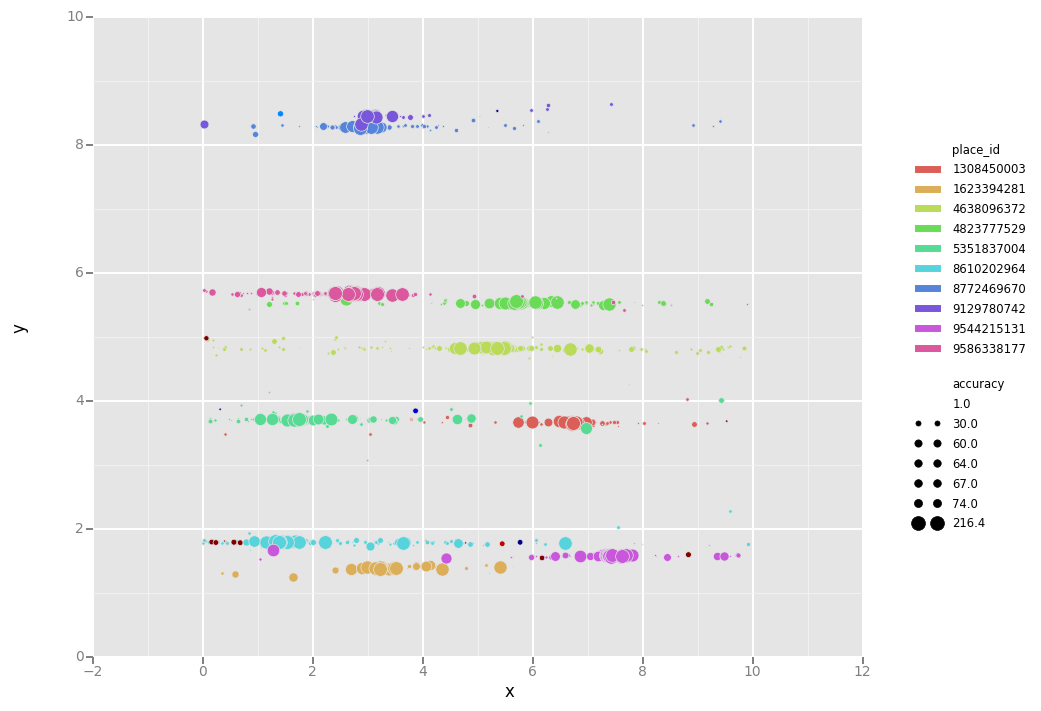

<ggplot: (404409661)>

In [32]:
ggplot(df_top_places, aes(x='x', y='y', color='place_id', size='accuracy')) +\
    geom_point()

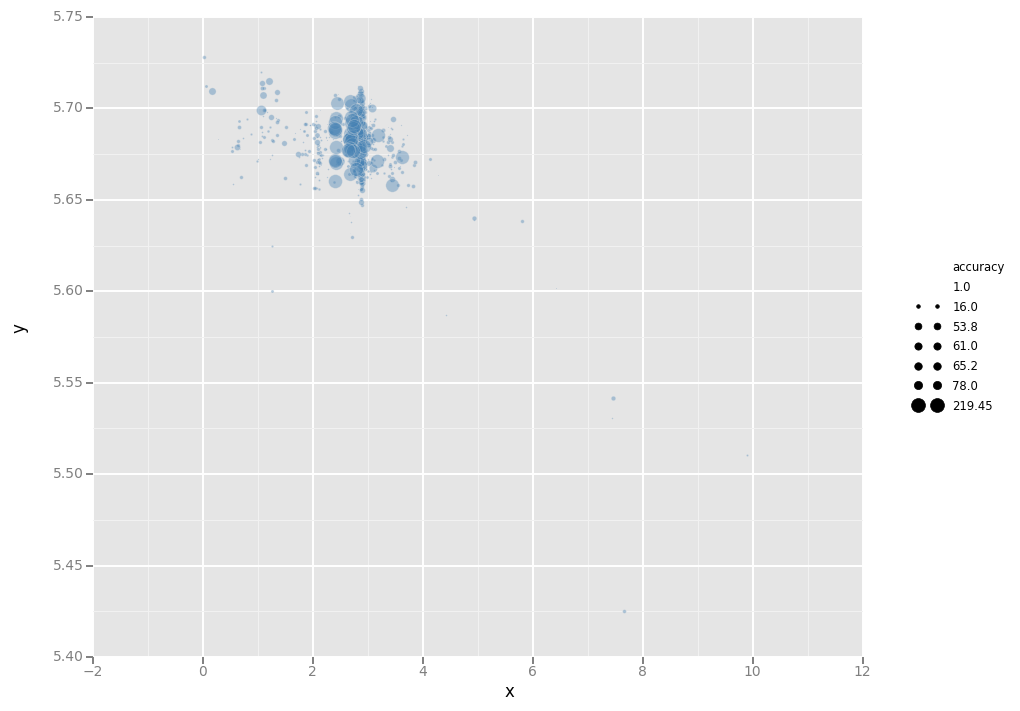

<ggplot: (404084181)>

In [39]:
ggplot(df_train[df_train.place_id == 9586338177], aes(x='x', y='y', size='accuracy')) +\
    geom_point(alpha=0.4, color='steelblue')

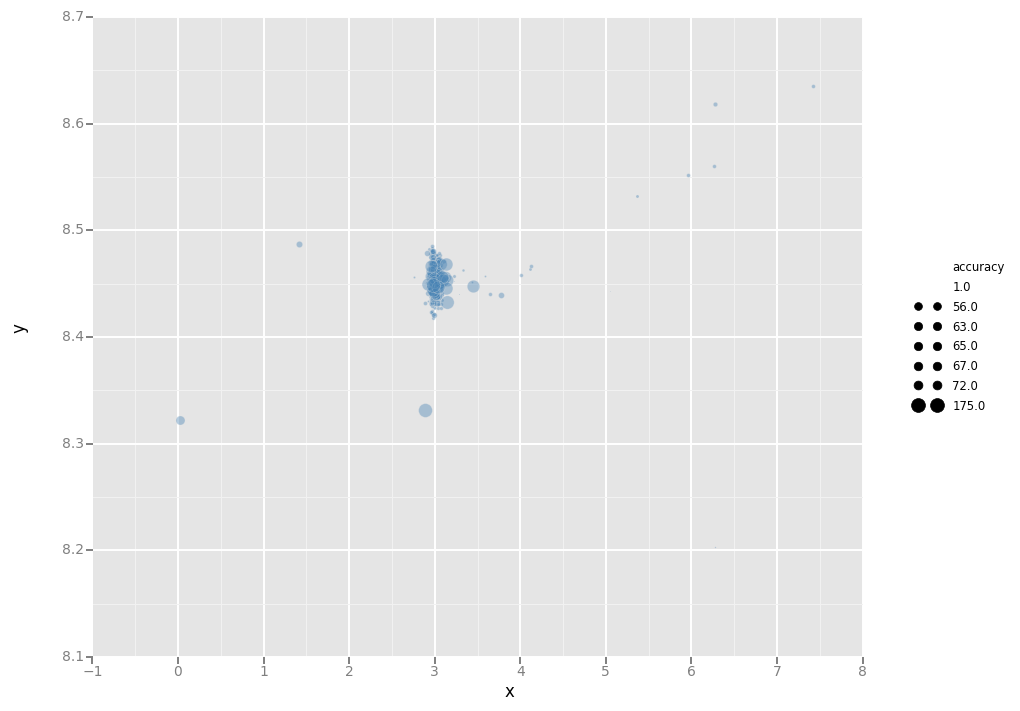

<ggplot: (418371845)>

In [40]:
ggplot(df_train[df_train.place_id == 9129780742], aes(x='x', y='y', size='accuracy')) +\
    geom_point(alpha=0.4, color='steelblue')